In [56]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from  sklearn  import datasets
from sklearn.model_selection import train_test_split

## Datasets

In [57]:
iris=datasets.load_iris()
X_iris=iris['data']
y_iris=iris['target']
X_iris=X_iris[y_iris<2,:2]
y_iris=y_iris[y_iris<2]
X_iris_train ,X_iris_test,y_iris_train,y_iris_test=train_test_split(X_iris,y_iris)

In [58]:
X=np.random.normal(0,1,size=(200,2))
y=np.array(X[:,0]**2+X[:,1] <1.5,dtype='int')
for  _ in range(20):
    y[np.random.randint(200)]=1
X_train,X_test,y_train,y_test=train_test_split(X,y)

## Logistic Regression

In [59]:
class logistic_regression():
    def __init__(self):
        self._theta=None
        self.coef_=None
        self.interception_=None
    def _sigmoid(self,t):
        return 1./(1.+np.exp(-t))
    def fit(self,X_train,y_train,lr=0.01,n_iters=1e4):
        def dj(theta,X_b,y):
            return (X_b.T.dot(self._sigmoid(X_b.dot(theta))-y)) /  len(X_b)
        def gd(X_b,y,initial_theta,lr,n_iters):
            theta=initial_theta
            for _ in range(int(n_iters)):
                gradient=dj(theta,X_b,y)
                theta=theta-lr*gradient
            return theta
        X_b=np.hstack([np.ones((len(X_train),1)),X_train])
        initial_theta=np.zeros(X_b.shape[1])
        self._theta=gd(X_b,y_train,initial_theta,lr=lr,n_iters=n_iters)
        self.interception_=self._theta[0]
        self.coef_=self._theta[1:]
        return self
    def predict(self,X_predict):
        X_b=np.hstack([np.ones((len(X_predict),1)),X_predict])
        prob=self._sigmoid(X_b.dot(self._theta))
        return np.array(prob>=0.5,dtype='int')
    def score(self,X_test,y_test):
        y_predict=self.predict(X_test)
        return accuracy_score(y_test,y_predict)
    def __repr__(self):
        return 'tomoya' 

## Eva

In [60]:
log_reg=logistic_regression()
log_reg.fit(X_iris_train,y_iris_train)
log_reg.score(X_iris_test,y_iris_test)

1.0

## Decision Boundary

In [61]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier 

In [62]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
    np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)),
    np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)))
    X_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(X_new).reshape(x0.shape)
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,y_predict,cmap=custom_cmap)

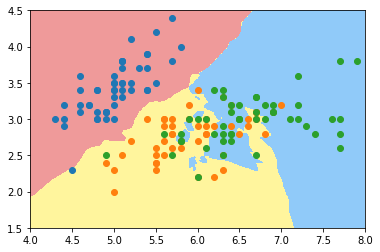

In [63]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(iris['data'][:,:2],iris['target'])
plot_decision_boundary(knn_clf,axis=[4,8,1.5,4.5])
plt.scatter(iris['data'][iris['target']==0,0],iris['data'][iris['target']==0,1])
plt.scatter(iris['data'][iris['target']==1,0],iris['data'][iris['target']==1,1])
plt.scatter(iris['data'][iris['target']==2,0],iris['data'][iris['target']==2,1])

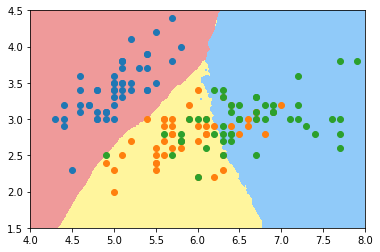

In [64]:
knn_clf=KNeighborsClassifier(n_neighbors=50)
knn_clf.fit(iris['data'][:,:2],iris['target'])
plot_decision_boundary(knn_clf,axis=[4,8,1.5,4.5])
plt.scatter(iris['data'][iris['target']==0,0],iris['data'][iris['target']==0,1])
plt.scatter(iris['data'][iris['target']==1,0],iris['data'][iris['target']==1,1])
plt.scatter(iris['data'][iris['target']==2,0],iris['data'][iris['target']==2,1])

## Polynomially

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline

In [66]:
def PolynomialLogisticRgression(degree,C,penalty='l1'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std',StandardScaler()),
        ('log_reg',LogisticRegression(C=C,penalty=penalty))
    ])

0.94


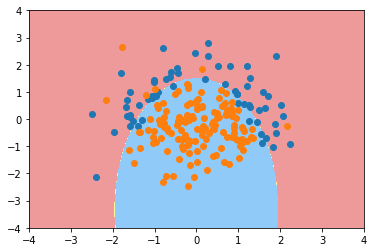

In [67]:
poly_log_reg=PolynomialLogisticRgression(degree=20,C=0.1)
poly_log_reg.fit(X_train,y_train)
print(poly_log_reg.score(X_test,y_test))
plot_decision_boundary(poly_log_reg,axis=[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])